# TP - Problèmes aux valeurs propres

Julien BLANCHON, Hamza BELKARKOR

**4 - ModIA**

L’objectif de ce TP est d’utiliser la méthode des différences finis pour calculer les modes propres de l’équation de Schrödinger sur un domaine $\Omega=]-R, R[\subset \mathbb{R}, R>0$ en présence d’un potentiel $V$ :

$$(E_1) : -\frac{\partial^{2} u}{\partial x^{2}}(x)+V(x) u(x)=E u(x) \quad x \in \Omega, \quad \int_{\Omega}|u|^{2}=1, \quad E \in \mathbb{R} $$

On considère ici des conditions au bord de type Dirichlet homogène : $u(−R) = u(R) = 0$.

Le potentiel $V$ est supposé borné, mais peut être discontinu. La fonction $u$ est appelée fonction d’onde. 

Son carré représente la probabilité de trouver la particule au voisinage de la position $x$.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl

In [4]:
# Matplotlib formating
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [15, 15]

In [5]:
# Definition de l'intervalle ]-R,R[ + mesh size
R = 1.0  # limite R
# R = 3.0
N = 20
# N = 59  # nombre points du maillage
h = 2*R/(N+1)  # pas en espace


In [6]:
X = np.linspace(-R, R, N+2)
X = X[1:-1]

## Modes propres du Laplacien 

Supposons pour commencer que le potentiel est nul : $V = 0$.


Le problème $(1)$ est alors équivalent au calcul des fonctions et valeurs propres de l’opérateur Laplacien unidimensionnel. 

$$(E_2) : -\frac{\partial^{2} u}{\partial x^{2}}(x) =E u(x) \quad x \in \Omega, \quad \int_{\Omega}|u|^{2}=1, \quad E \in \mathbb{R} $$

Ce problème a été étudié en cours et nous savons qu’il possible de déterminer exactement ces modes propres. Ceci nous permettra de comparer les valeurs numériques obtenues par la méthode des différences finies à ces valeurs analytiques.

### Exercice 1 
Calculer les modes propres $\left(u_{k}, E_{k}\right)_{k \geq 1}$ du problème $(E_1)$ avec $V = 0$

$$u_{k}(x)=\frac{1}{\sqrt{R}} \sin \left(\frac{k \pi(x+R)}{2 R}\right), \quad E_{k}=\frac{k^{2} \pi^{2}}{4 R^{2}}$$


On conside le cas général où $\Omega=[0;L]$, $u(0)=u(L)=0$ et $L>0$.

$$\cdots$$
> - Si E < 0, alors:
    $$u(x) = a e^{\sqrt{-E} x} + b e^{-\sqrt{-E} x},  a,b \in \mathbb R$$
    
> On pose $E = -\omega^2$. D'après les conditions aux limites : 

$$
\left\{
    \begin{eqnarray}
        u(-R)&=0\\
        u(R)&=&0
    \end{eqnarray}
\right.\\
$$
$$
\Leftrightarrow\left\{
    \begin{eqnarray}
        a=&-b\\
        a(e^{\omega} - e^{-\omega})&=&0
    \end{eqnarray}
\right.\\
$$
$$
\Leftrightarrow
\omega = 0 
$$

> - Si E = 0, alors: $∃(a, b)$ $\in$ $R$ tel que $u(x) = ax + b$. 

> Or, en utilisant les conditions aux limites:
$$
\left\{
    \begin{eqnarray}
        u(-R)&=0\\
        u(R)&=&0
    \end{eqnarray}
\right.\\
$$
> On obtient a = b = 0, d'où u = 0. On ne peut donc pas avoir E = 0.

> - D'où E > 0, et dans ce cas:

$$
\begin{eqnarray}
    u(x)=a\cos(\omega x) + b\sin(\omega x)
\end{eqnarray}
$$

> En utilisant les conditions aux limites:
$$
\left\{
    \begin{eqnarray}
        u(-R)&=&a\cos(\omega R) - b\sin(\omega R)&=&0\\
        u(R)&=&a\cos(\omega R) + b\sin(\omega R)&=&0
    \end{eqnarray}
\right.\\
$$

$$
\Leftrightarrow\left\{
    \begin{eqnarray}
        a\cos(\omega R) &=&0\\
        b\sin(\omega R) &=&0
    \end{eqnarray}
\right.
$$

> On a:  
 > * Si $\textbf{a=0}$ :   
 > Si $b=0$, alors: $$u(x)=0$$      
    Sinon:
$$\sin(\omega R)=0 \Rightarrow \omega R = k\pi \Rightarrow u_k(x)=b\sin(\frac{k\pi}{R}x)$$
        
> * Si $\textbf{a} \neq \textbf{0}$
$$\cos(\omega R)=0 \Rightarrow \sin (\omega R) = \pm 1 \Rightarrow b=0\\
\cos(\omega R)=0 \Rightarrow \omega R = \frac{\pi}{2}+k\pi \Rightarrow u_k(x)=a\cos(\frac{(2k+1)\pi}{2 R}x)$$

Si on note $m = 2k + 1$, m est impair, et donc on a $cos(\theta) = sin(\theta + k\frac{\pi}{2})$. On en déduit :  
$$
u_k(x) = a sin(\frac{m \pi(x+R)}{2R}) 
$$

Et en utilisant le fait que $\int |u|^2 = 1$ , on obtient :
$$
u_k(x) = \frac{1}{R} sin(\frac{m \pi(x+R)}{2R}) 
$$

Enfin on a : 
$$ u_k(x) = \frac{1}{\sqrt(R)}\sin(\frac{k \pi (x + R)}{2R})$$
$$
\Rightarrow u_k'(x) = \frac{k\pi}{2R\sqrt{R}}cos(\frac{k \pi (x + R)}{2R})\\
\Rightarrow -u_k''(x) = \frac{k^2\pi^2}{4R^2\sqrt{R}}sin(\frac{k \pi (x + R)}{2R}) = E_k  \frac{1}{\sqrt(R)}\sin(\frac{k \pi (x + R)}{2R})\\
\Rightarrow E_k = \frac{k^2\pi^2}{4R^2}
$$

In [26]:
def u_k(k, x, R):
    uk = (1 / np.sqrt(R)) * np.sin(k * np.pi * (x + R) / (2 * R))
    uk = uk/npl.norm(uk)
    return uk

def u_all(x, R): #Already sorted
    return np.array([u_k(k, x, R) for k in range(1, N+1)])

def E_k(k, R):
    return (k**2 * np.pi**2)/(4*R**2)
    
def E_all(x, R):  # Already sorted
    return np.array([E_k(k, R) for k in range(1, N+1)])

### Exercice 2
On approche ce problème grâce à la méthode des différences finies :
$$-\frac{u_{i-1}-2 u_{i}+u_{i+1}}{h^{2}}=E_{N} u_{i}, \quad i \in\{1: N\}, \quad u_{0}=u_{N+1}=0$$

$$\cdots$$
> Soit $$U = \left(\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{N-1} \\
u_{N}
\end{array}\right)$$
> 
> On à la relation $B \mathcal{U}= E D \mathcal{U}$.
> 
> Avec $\begin{equation}
B=\left[\begin{array}{cccccc}
1 & 0 & \cdots & \cdots & \cdots & 0 \\
-\frac{1}{h^{2}} & \frac{2}{h^{2}} & -\frac{1}{h^{2}} & 0 & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & -\frac{1}{h^{2}} & \frac{2}{h^{2}} & -\frac{1}{h^{2}} \\
0 & \cdots & \cdots & \cdots & 0 & 1
\end{array}\right]
\end{equation}$
> 
> et $\begin{equation}
D=\left[\begin{array}{cccccc}
0 & \ldots & \ldots & \ldots & \ldots & 0 \\
0 & 1 & 0 & \ldots & \ldots & 0 \\
\vdots & \ddots & \ddots & \ddots & & \vdots \\
\vdots & & \ddots & \ddots & \ddots & \vdots \\
0 & \ldots & \ldots & 0 & 1 & 0 \\
0 & \ldots & \ldots & \ldots & 0 & 0
\end{array}\right]
\end{equation}$
>
> La première et la dernière ligne de $B$ et de $D$ impose la condition $u_0 = u_{N+1} = 0$ 


### Exercice 3

En éliminant les conditions au bord (cad en ne considérant plus $u_0$ et $u_{N+1}$), la relation :

$$\underbrace{\frac{1}{h^{2}}\left(\begin{array}{ccccc}
2 & -1 & 0 & \ldots & 0 \\
-1 & 2 & -1 & \ldots & 0 \\
0 & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ldots & -1 & 2 & -1 \\
0 & \ldots & 0 & -1 & 2
\end{array}\right)}_{A}\left(\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{N-1} \\
u_{N}
\end{array}\right)=E_{N}\left(\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{N-1} \\
u_{N}
\end{array}\right)$$


$$AU = E_NU$$

In [8]:
from scipy.sparse import diags

# 1D Finite Difference Matrix
def make_A(N, R):
    h = (2*R)/(N+1)
    offsets = [-1, 0, 1]
    diagonals = [-np.ones(N-1), 2*np.ones(N), -np.ones(N-1)]
    A = (1/h**2)*diags(diagonals, offsets).toarray() 
    # Dommage de devoir rendre la matrice pleine pour la suite
    return A

In [9]:
A = make_A(N, R)
A

array([[ 220.5 , -110.25,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ],
       [-110.25,  220.5 , -110.25,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  , -110.25,  220.5 , -110.25,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  , -110.25,  220.5 , -110.25,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , -110.25,  220.5 , -110.25,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    

### Exercice 4 
En utilisant la fonction `eig` de la librairire `numpy.linalg` (`nlg`), résoudre ce problème.
Montrer en particulier que la méthode des différences finies approche exactement les
fonctions propres $u_k$ pour $1 ≤ k ≤ N$.

Logiquement pour les valeurs propres de $A$ on à : $Av_{A_k} = \lambda_k v_{A_k}$
Donc on retrouve donc $v_k = u_k$ et $\lambda_k = E_k$ 

In [10]:
eigval, eigvec = npl.eig(A)
idx = np.argsort(eigval)
eigval = eigval[idx]
eigvec = eigvec[:,idx]

# Fix sign
for i in range(N):
    eigvec[:, i] = (-1 if eigvec[0, i] < 0 else +1)*eigvec[:, i]


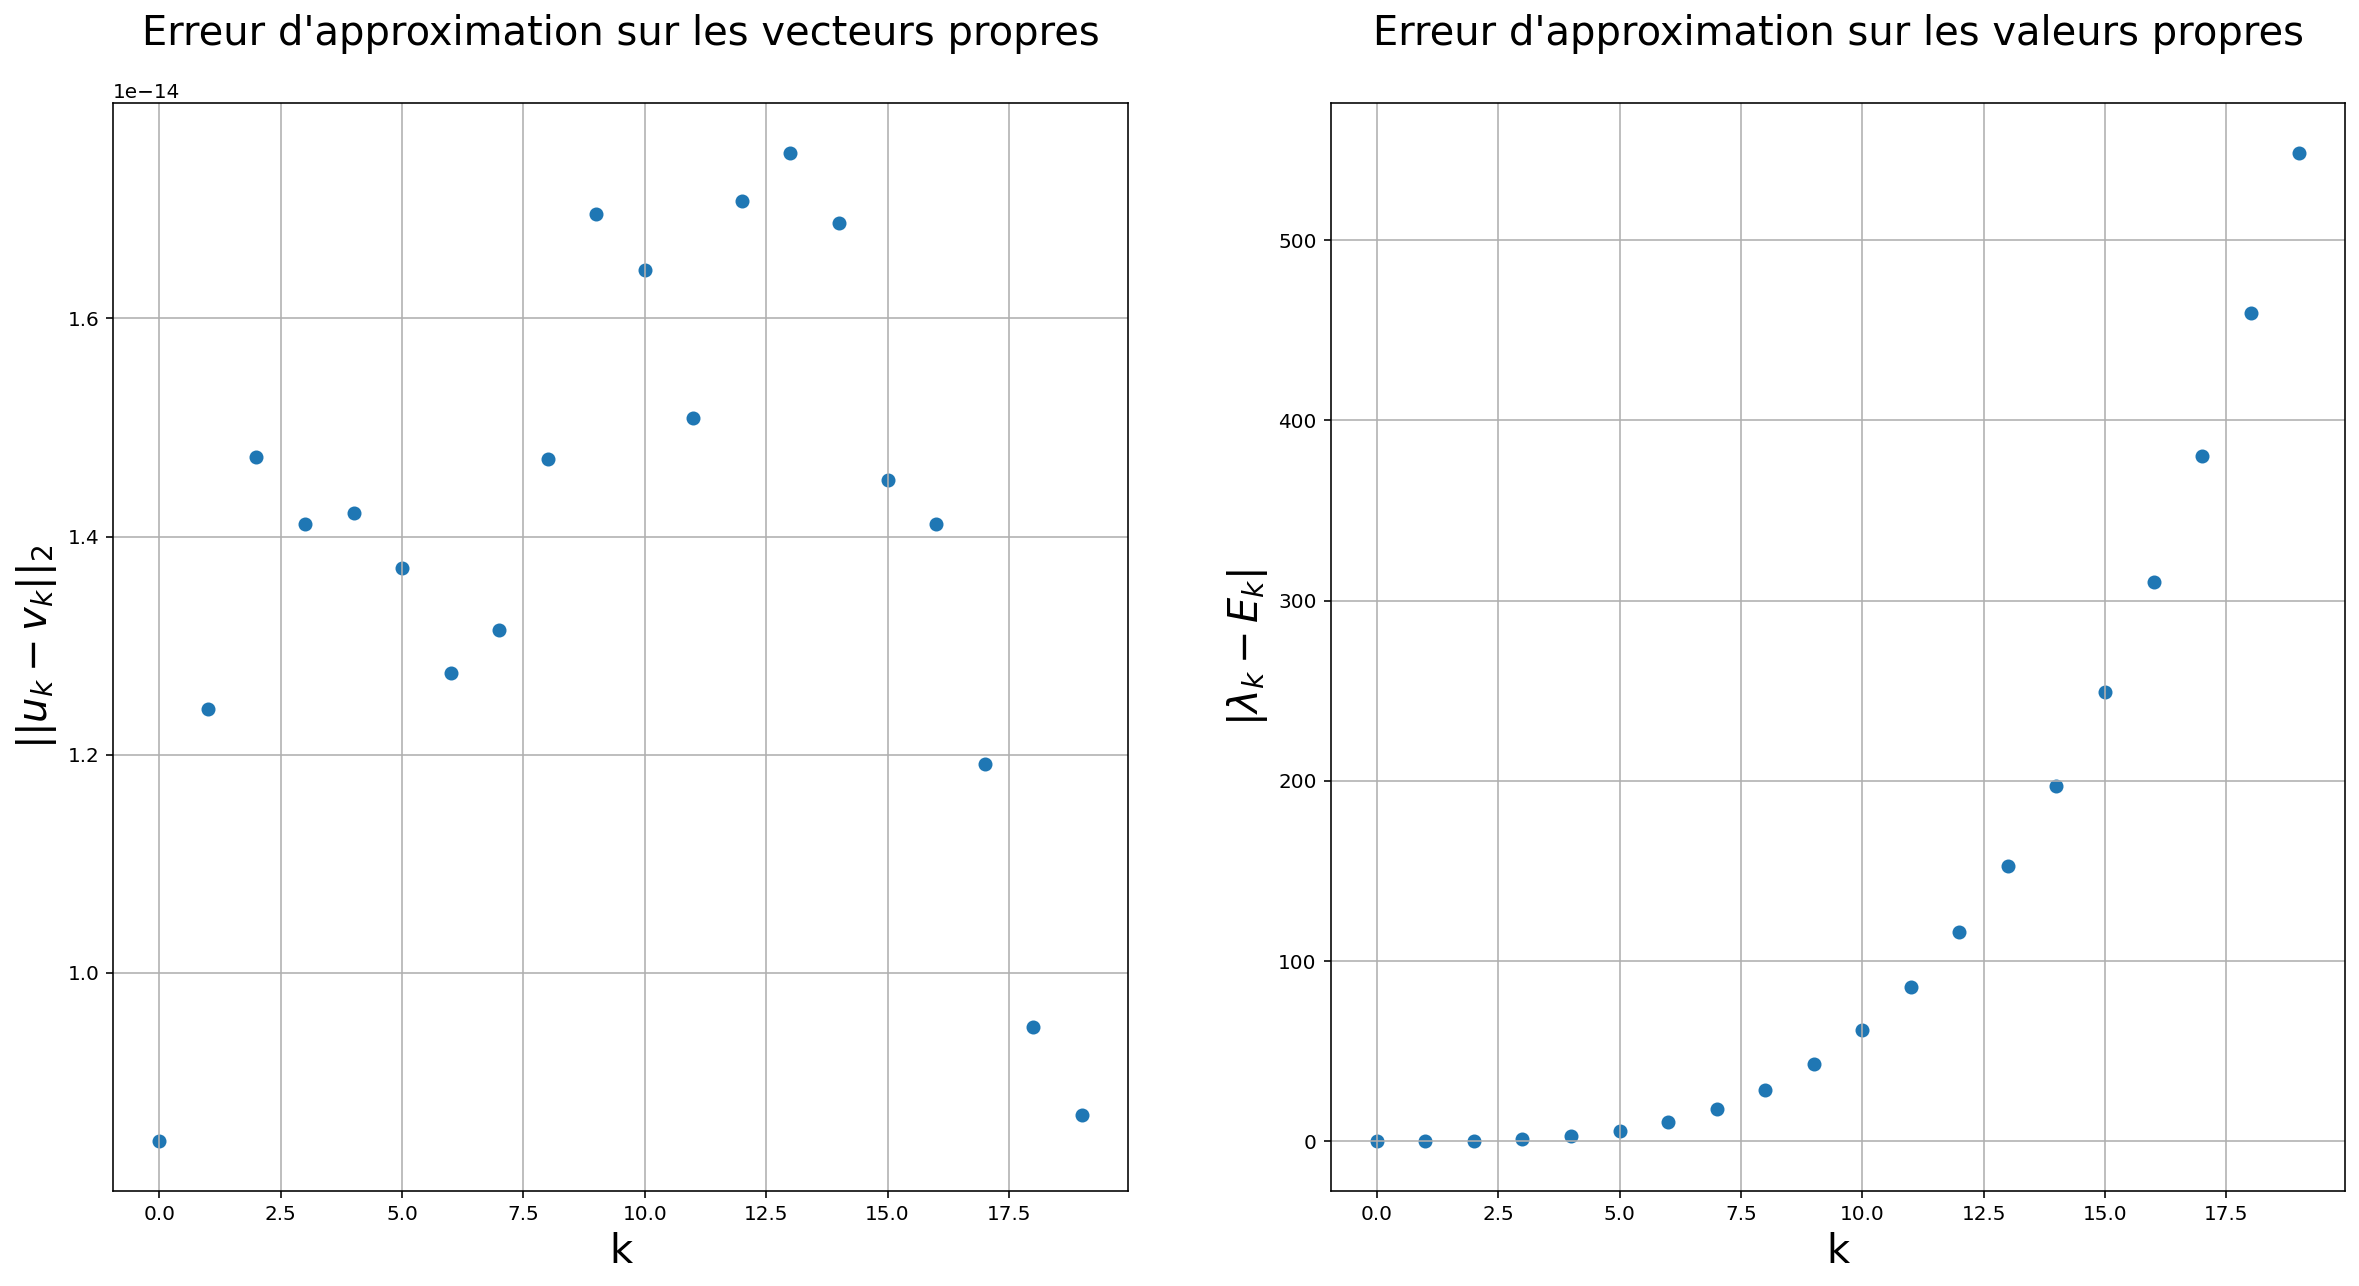

In [11]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.scatter(range(N), npl.norm(eigvec - u_all(X, R), axis=1))
ax0.set_title(
    "Erreur d'approximation sur les vecteurs propres\n", fontsize=20)
ax0.set_xlabel("k", fontsize=20)
ax0.set_ylabel("$||u_k - v_k||_2}$", fontsize=20)
ax0.grid()

ax1.scatter(range(N), np.abs(eigval - E_all(X, R)))
ax1.set_title(
    "Erreur d'approximation sur les valeurs propres\n", fontsize=20)
ax1.set_xlabel("k", fontsize=20)
ax1.set_ylabel("$|\lambda_k - E_k|}$", fontsize=20)
ax1.grid()


> Pour $v_k = u_k$, on à bien une égalité avec erreur numérique de l'ordre de $10^{-14}$, l'epsilon machine.
> 
> Pour $\lambda_k = E_k$, on à bien une égalité pour les $k$ très faible puis l'erreur explose. Notre modèle n'est donc valable que pour les premières valeurs propres (quand $\frac{k}{N+1}$ est grand).

Les valeurs propres théorique de $A$ (`eigval_theo`) sont calculable avec : 

$$\lambda_{k}=\frac{4}{h^{2}} \sin ^{2}\left(\frac{k \pi}{2(N+1)}\right)$$

In [12]:
def eigval_theo_k(k):
    h = (2*R)/(N+1)
    return (4/h**2) * np.sin(k*np.pi/(2*(N+1)))**2

def eigval_theo_k_all():
    return np.array([eigval_theo_k(k) for k in range(1, N+1)])


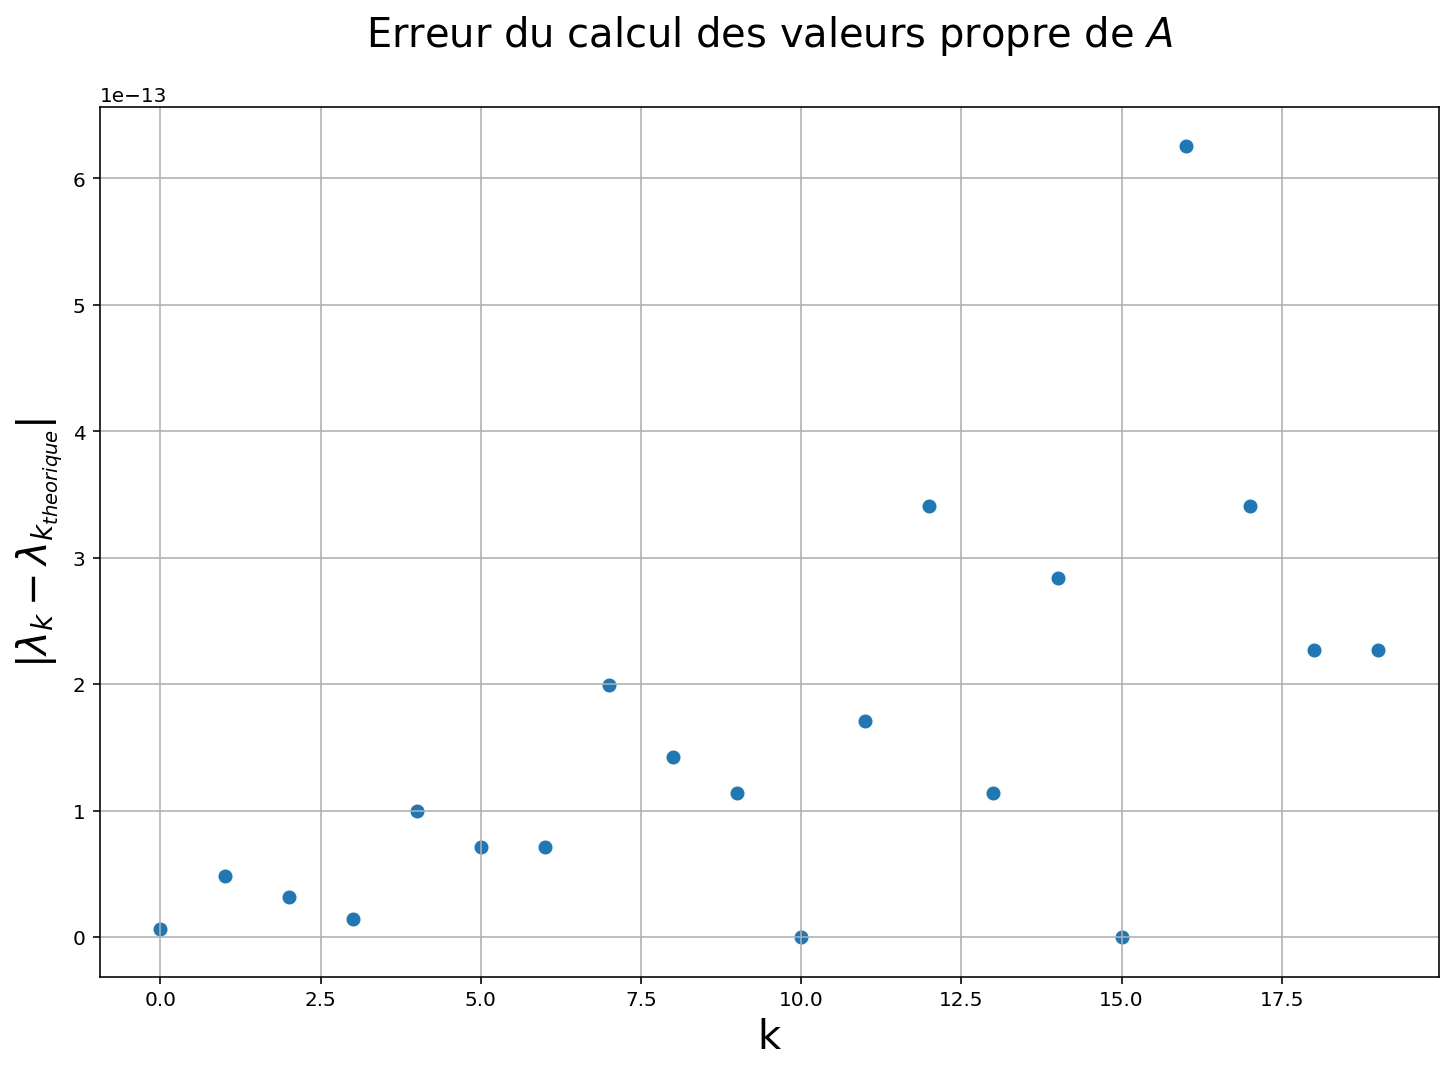

In [13]:
plt.figure(figsize=(12, 8))

plt.scatter(range(N), np.abs(eigval - eigval_theo_k_all()))
plt.title(
    "Erreur du calcul des valeurs propre de $A$\n", fontsize=20)
plt.xlabel("k", fontsize=20)
plt.ylabel("$|\lambda_k - \lambda_{k_{theorique}}|}$", fontsize=20)
plt.grid()


Il n'y a pratiquement aucune erreur ($10^{-14}$, epsilon machine) entre les valeurs propres théorique de $A$ et numérique calculé par `numpy.linalg`.

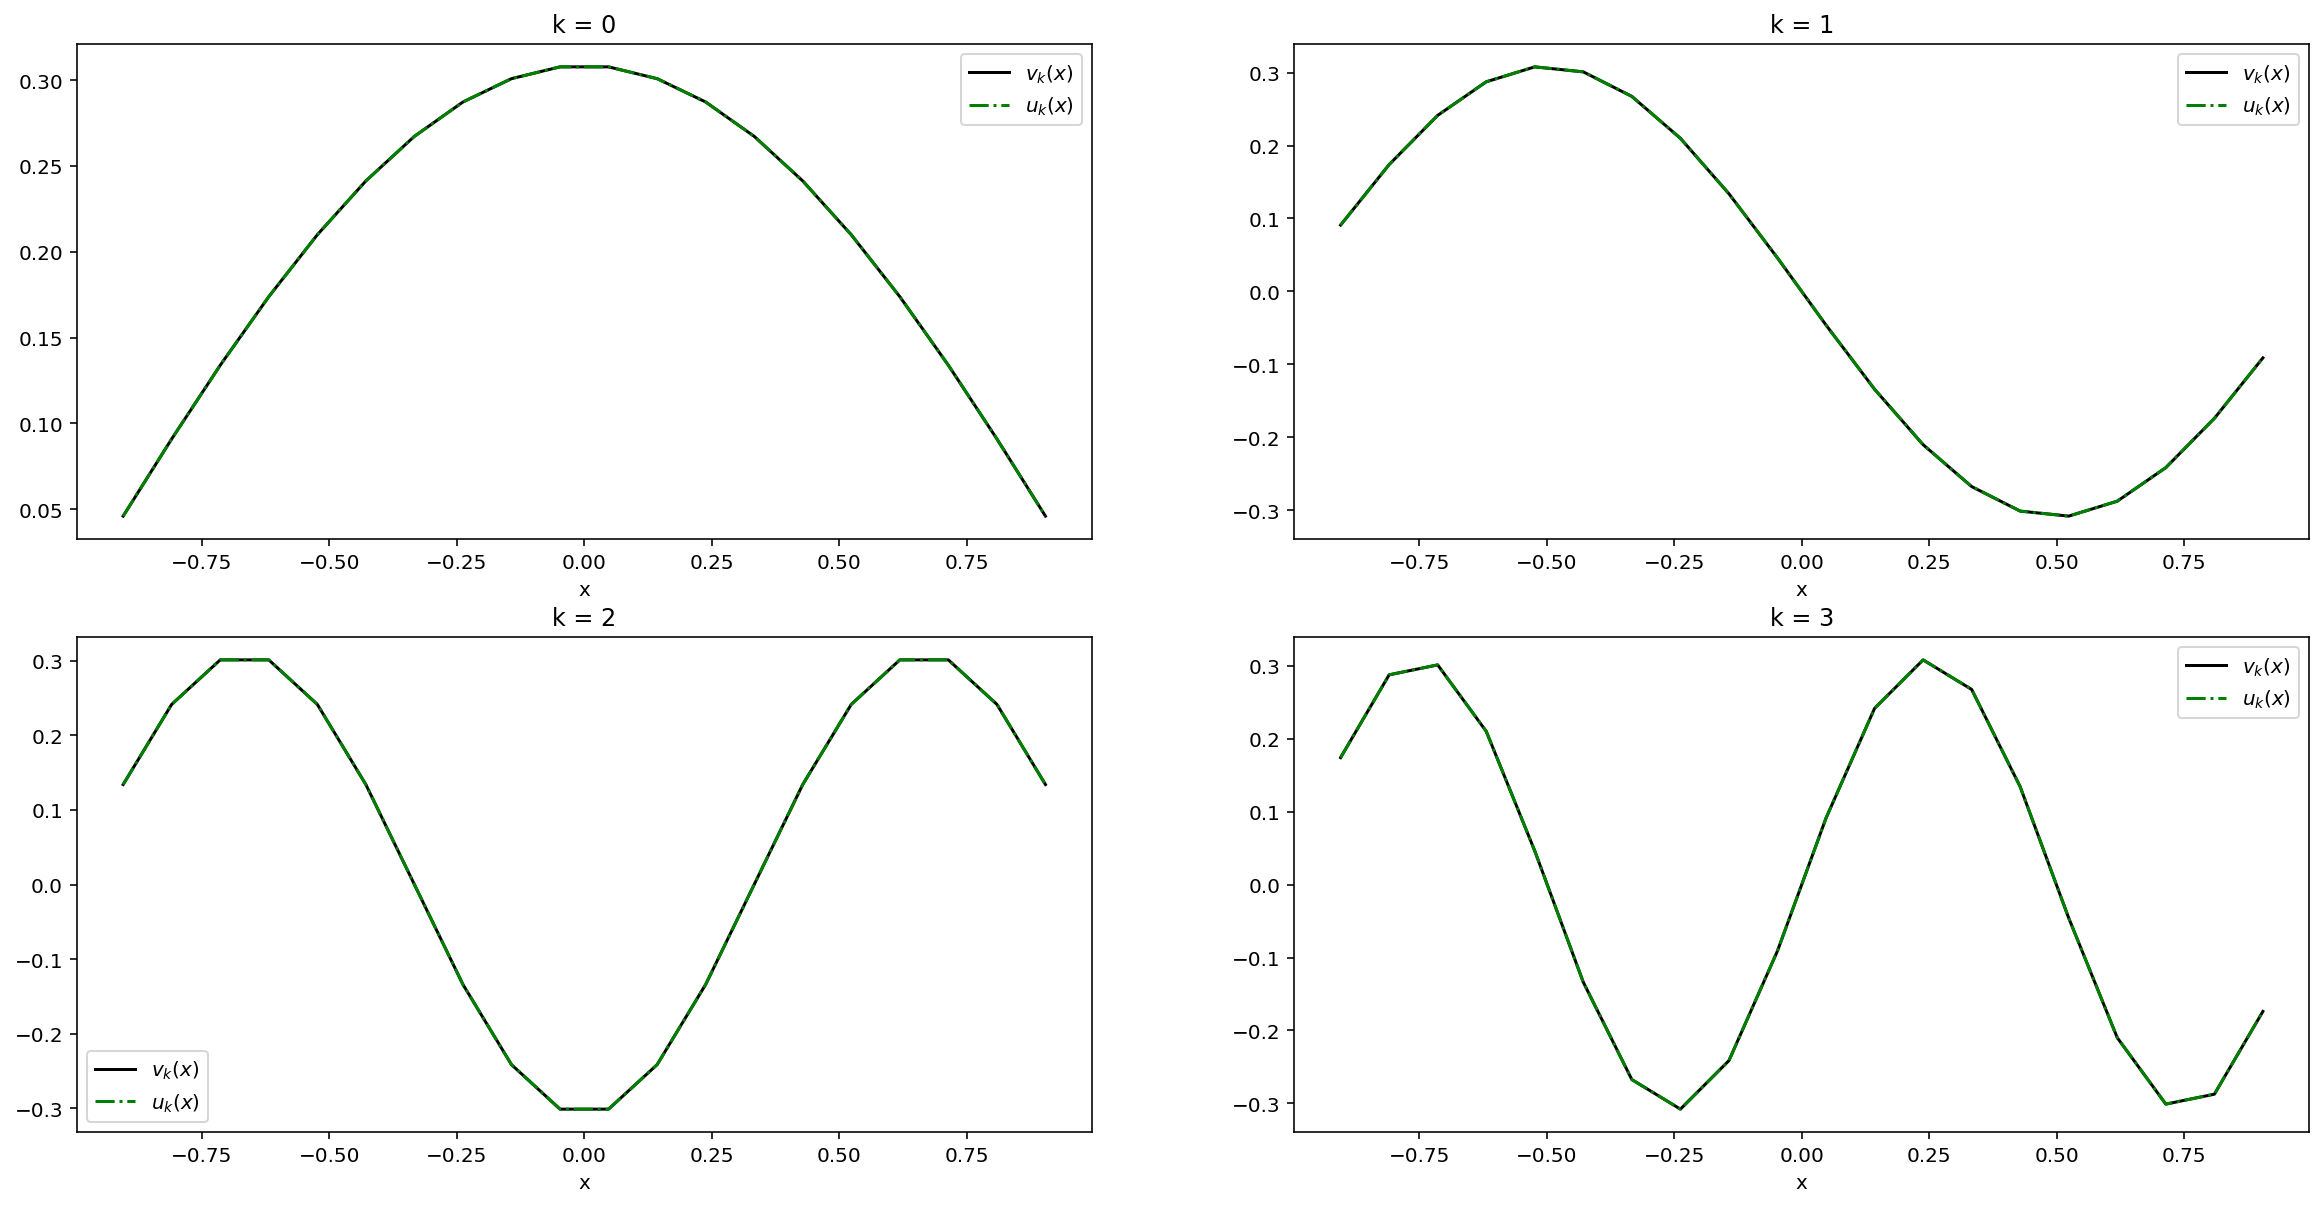

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

calculate_uk = eigvec
real_uk = u_all(X, R)

for i, ax in enumerate(axs.flatten()):
    ax.plot(X, real_uk[i], c="black", label="$v_k(x)$")
    ax.plot(X, calculate_uk[:, i], c="green", label="$u_k(x)$", linestyle='-.')
    ax.set_xlabel("x")
    ax.set_title(f"k = {i}")
    ax.legend()


On déduit que la méthode des différences finies permet de bien approcher les fonctions propres théoriques.

### Exercice 5
En déduire un critère sur $N$ pour obtenir une approximation des $M$ premières valeurs propres du problème continu avec un précision relative $ε$.

> On se fixe une précision relative $ε$:
> 
> Pour la valeur propre de rang $k$, on à:
> 
> $$\left|E_{k}-\lambda_{k}\right| \leq \epsilon$$
> 
> $$-\epsilon \leq \frac{k^{2} \pi^{2}}{4 R^{2}}-\frac{(N+1)^{2}}{R^{2}} \sin ^{2}\left(\frac{k \pi}{2(N+1)}\right) \leq \epsilon$$
> 
> $$(1-\epsilon) \frac{k^{2} \pi^{2}}{4} \leq(N+1)^{2} \sin ^{2}\left(\frac{k \pi}{2(N+1)}\right) \leq(1+\epsilon) \frac{k^{2} \pi^{2}}{4}$$
> 
> $$f(k) \leq h(k, N) \leq g(k)$$
> 
> Ainsi pour avoir un précision de $ε$ pour les M première valeurs propre, il faut que $h(k, N)$ doit être compris entre $f(k)$ et $g(k)$ pour tout $k \leq M$.

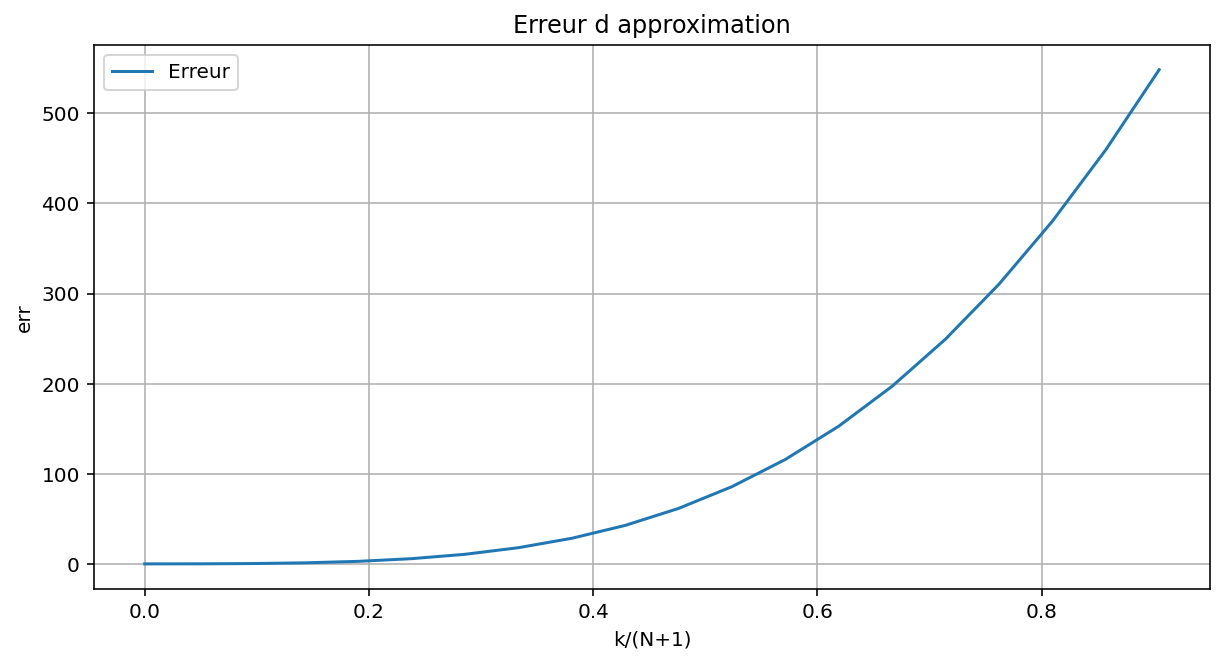

In [15]:
k_N =np.zeros(N)
for k in range (1,N):
    k_N[k] = k/(N+1)
    
plt.figure(figsize=(10, 5))
plt.plot(k_N, np.abs(E_all(1, 1) - eigval_theo_k_all()) ,label = "Erreur")
plt.title("Erreur d approximation")
plt.xlabel('k/(N+1)')
plt.ylabel('err')

plt.legend()
plt.grid()
plt.show()

On observe sur ce tracé que l'erreur d'approximation augmente en fonction de `𝑘/𝑁+1`, et que cette dernière explose effectivement à partir d'une certaine valeur de `𝑘/𝑁+1`.

Le schéma est donc plus précis pour les premières valeurs propres.

## Modes propres de l’opérateur de Schrödinger

On considère maintenant le problème $(1)$ en présence d’un potentiel ($V ≠ 0$). Comme mentionné précédement, ce potentiel peut être discontinu. On considère dans la suite le potentiel "puit" :

$$V(x)= \left\{\begin{array}{l}
0 \text { si }|x| \leq a \\
V_{0} \text { si } a \leq|x| \leq R
\end{array}\right.$$

avec $V_{0} \geq 0$ et $0<a<R$. En mécanique quantique, ce potentiel est une représentation simple d'une particule confinée dans une boite. Dans cette situation, on ne dispose plus d'une expression analytique des modes propres de l'opérateur de Schrödinger


### Exercice 1

Modifier la matrice $A$ sous la forme $A + A_V$ afin de prendre en compte ce potentiel.

> Il suffit d’ajouter à la matrice précédente $A$ la matrice $A_V$:
>

$$\left( \underbrace{\frac{1}{h^{2}}\left(\begin{array}{ccccc}
2 & -1 & 0 & \ldots & 0 \\
-1 & 2 & -1 & \ldots & 0 \\
0 & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ldots & -1 & 2 & -1 \\
0 & \ldots & 0 & -1 & 2
\end{array}\right)}_{A} + \underbrace{\left(\begin{array}{ccccc}
V_1 & 0 & 0 & \ldots & 0 \\
0 & V_2 & 0 & \ldots & 0 \\
0 & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ldots & 0 & V_{N-1} & 0 \\
0 & \ldots & 0 & 0 & V_{N}
\end{array}\right)}_{A_v} \right) \left(\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{N-1} \\
u_{N}
\end{array}\right)=E_{N}\left(\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{N-1} \\
u_{N}
\end{array}\right)$$

In [16]:
def v(xi, v0=2, a=R/2, R=R):
    return 0 if np.abs(xi)<=a else v0

def V(X, v0=2, a=R/2, R=R):
    return np.array([v(xi, v0, a, R) for xi in X])

def make_Av(X, v0=2, a=R/2, R=R):
    offsets = [0]
    diagonals = [V(X, v0, a, R)]
    Av = diags(diagonals, offsets).toarray()
    return Av

Av = make_Av(X, v0=2, a=R/2, R=R)

Anew = A + Av

### Exercice 2

Implémenter la méthode de la puissance inverse afin de donner une approximation des deux premières valeurs propres. Représenter ces valeurs propres en fonction du pas $h$.


Nous allons donc composé 3 méthodes :
- Méthode inverse: Power méthode sur $A^{-1}$ pour avoir la valeur propre la plus proche de 0 en module (plus faible module).
- Méthode Decallage: Décallage de $A$ avec $B=A-\mu I$ pour avoir la valeur propre la plus proche (en module) de $\mu$
- Méthode de la deflation: Pour supprimer une valeur propre donnée du spectre de $A$ pour le calcul des suivantes.


Méthode inverse avec decallage:

$$b_{k+1}=\frac{(A-\mu I)^{-1} b_{k}}{C_{k}}$$ 

$b_k$ se rapproche du vecteurs propre de la valeur propre la plus proche de $\mu$ (en module).

(Voir wiki : https://en.wikipedia.org/wiki/Inverse_iteration#Methods_to_find_approximate_eigenvalues)



In [17]:
def methode_inverse(A, b0=np.ones(N), eps=1e-6, maxiter=1000):
    # Valeur propre de module le plus faible de A
    k=0
    b0 /= npl.norm(b0)
    b_old = np.copy(b0)
    stagnation = +np.inf
    # Tant Que : Critere de Stagnation et MaxIter
    while k <= maxiter and stagnation >= eps:
        b_new = npl.solve(A, b_old)
        b_new = b_new / npl.norm(b_new)
        stagnation = npl.norm(b_new - b_old)
        b_old = b_new
        k += 1
    eigvec = b_new
    eigval = npl.norm(A@eigvec)
    return eigval, eigvec

In [18]:
def decallage(A, mu=0.0, b0=np.ones(N), eps=1e-6, maxiter=1000):
    # methode_inverse sur B=A-mu*I
    # Converge d'autant plus vite que mu est proche de la valeur propre
    I = np.eye(N)
    B = A - mu*I
    eigval, eigvec = methode_inverse(B, b0, eps, maxiter)
    return eigval, eigvec

In [19]:
def Rayleigh(A, mu0=0.0, b0=np.ones(N), eps=1e-6, maxiter=1000):
    # Optimisation avec https://en.wikipedia.org/wiki/Rayleigh_quotient_iteration
    pass

In [20]:
def deflation(A, n=3, mu0=0.0, b0=np.ones(N), eps=1e-6, maxiter=1000):
    A_deflation = A
    mu = mu0
    eigval = []
    eigvec = []
    for i in range(n):
      eigvalA, eigvecA = decallage(A_deflation, mu, b0, eps, maxiter)
      _, eigvecAt = decallage(A_deflation.T, mu, b0, eps, maxiter)
      A_deflation = A - (eigvalA)*(eigvecAt.reshape(-1, 1)
                                 @ eigvecA.reshape(-1, 1).T)
      ## --- Soucis, maintenant 0.0 est dans le spectre de A_deflation. Ainsi on convergeras vers la valeur propre nulle :(
      ## La déflation ne marche donc pas pour les méthodes inverse ?
      ## Il semblerais qu'il ne soit finalement pas demander d'aller plus loin
      ## N'ayans pas plus d'information nous utiliserons simplement eig
      mu = eigvalA
      eigval.append(eigvalA)
      eigvec.append(eigvecA)
    return eigval, eigvec


In [21]:
N_list = np.arange(start=1, step=10, stop=300)
h_list = (2*R)/(N_list + 1)

num_eig = 5

eigvals = np.empty(shape=(num_eig, len(N_list)))
for i, N in enumerate(N_list):
    X_lin = np.linspace(-R, R, N+2)
    X_lin = X_lin[1:-1]
    Anew = make_A(N, R) + make_Av(X_lin, v0=2, a=R/2, R=R)
    eigval, eigvec = npl.eig(Anew)
    idx = np.argsort(eigval)
    eigval, eigvec = eigval[idx], eigvec[:, idx]
    eigvals[:, i] = eigval[:num_eig]


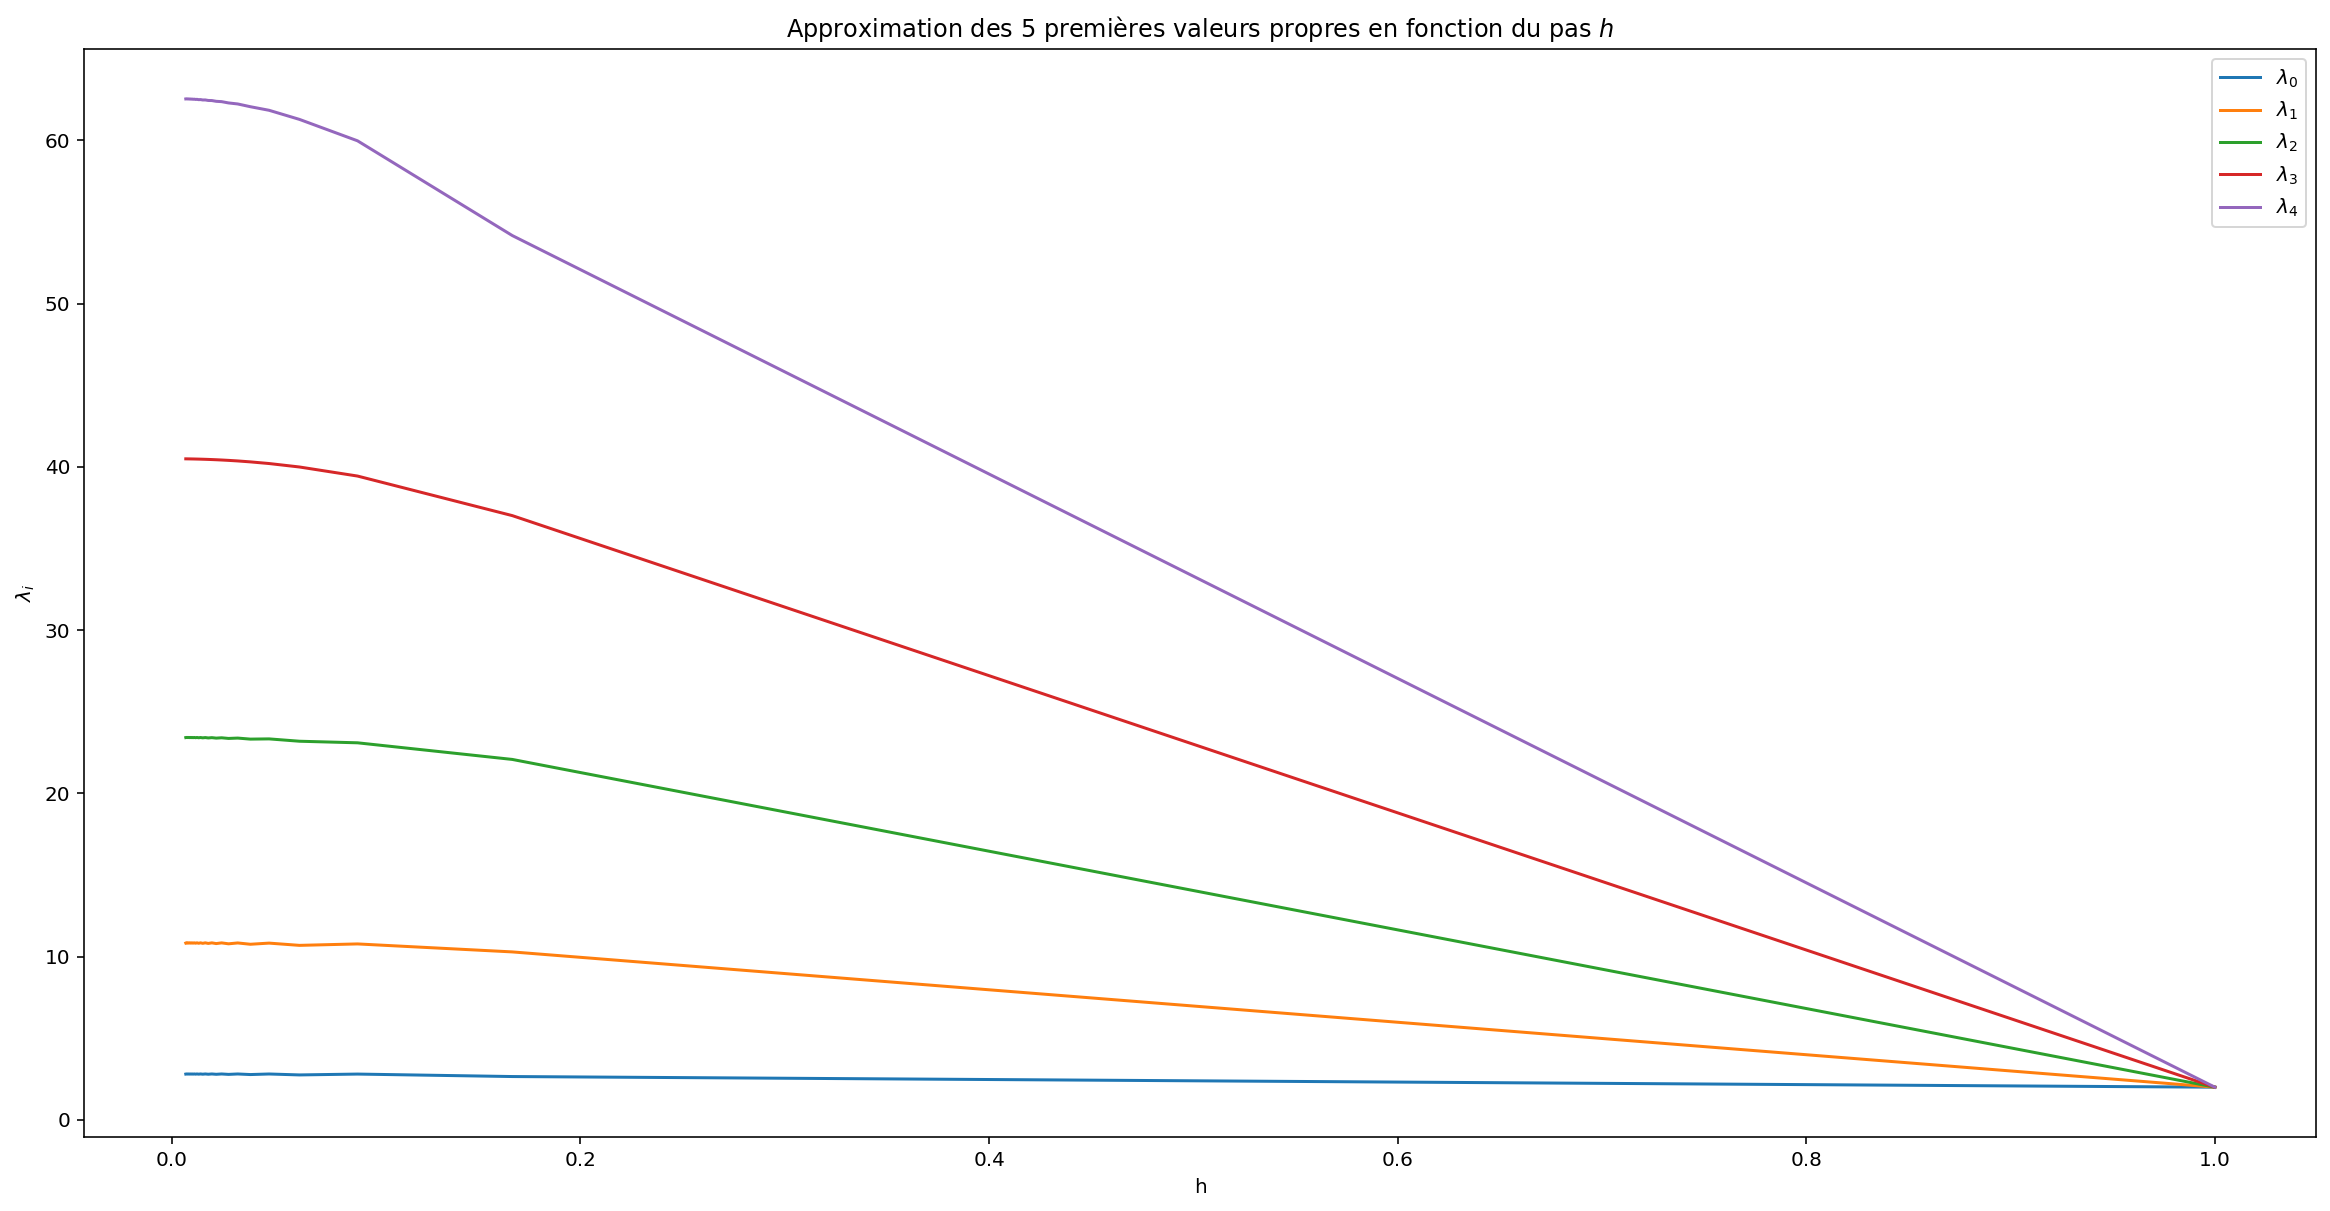

In [22]:
fig = plt.figure(figsize=(20, 10))

for i, eigval in enumerate(eigvals):
    plt.plot(h_list, eigval, label=f"$\lambda_{i}$")
    plt.xlabel("h")
    plt.ylabel("$\lambda_i$")
    plt.legend()

plt.title(
    f"Approximation des ${num_eig}$ premières valeurs propres en fonction du pas $h$")
plt.show()

### Exercice 3

Représenter sur le même graphique les fonctions propres de l’opérateur Laplacien et de l’opérateur de Schrödinger. Qu’observez-vous ?

In [23]:
R = 1.0  # limite R
# R = 3.0
N = 100
# N = 59  # nombre points du maillage
h = 2*R/(N+1)  # pas en espace

X = np.linspace(-R, R, N+2)
X = X[1:-1]

a = 0.5
v0 = 10000

#Laplacien
A_Laplacien = make_A(N, R)
eigval_Laplacien, eigvec_Laplacien = npl.eig(A_Laplacien)
idx_Laplacien = np.argsort(eigval_Laplacien)
eigval_Laplacien = eigval_Laplacien[idx_Laplacien]
eigvec_Laplacien = eigvec_Laplacien[:,idx_Laplacien]

for i in range(N):
    eigvec_Laplacien[:, i] = (-1 if eigvec_Laplacien[0, i]
                              < 0 else +1)*eigvec_Laplacien[:, i]

#Schrodinger
A_Schrodinger = make_A(N, R) + make_Av(X, v0=v0, a=a, R=R)
eigval_Schrodinger, eigvec_Schrodinger = npl.eig(A_Schrodinger)
idx_Schrodinger = np.argsort(eigval_Schrodinger)
eigval_Schrodinger = eigval_Schrodinger[idx_Schrodinger]
eigvec_Schrodinger = eigvec_Schrodinger[:, idx_Schrodinger]

for i in range(N):
    eigvec_Schrodinger[:, i] = (-1 if eigvec_Schrodinger[0, i]
                                < 0 else +1)*eigvec_Schrodinger[:, i]


On représente sur la même figure les fonctions propres du Laplacien et de l’opérateur de Schrödinger:

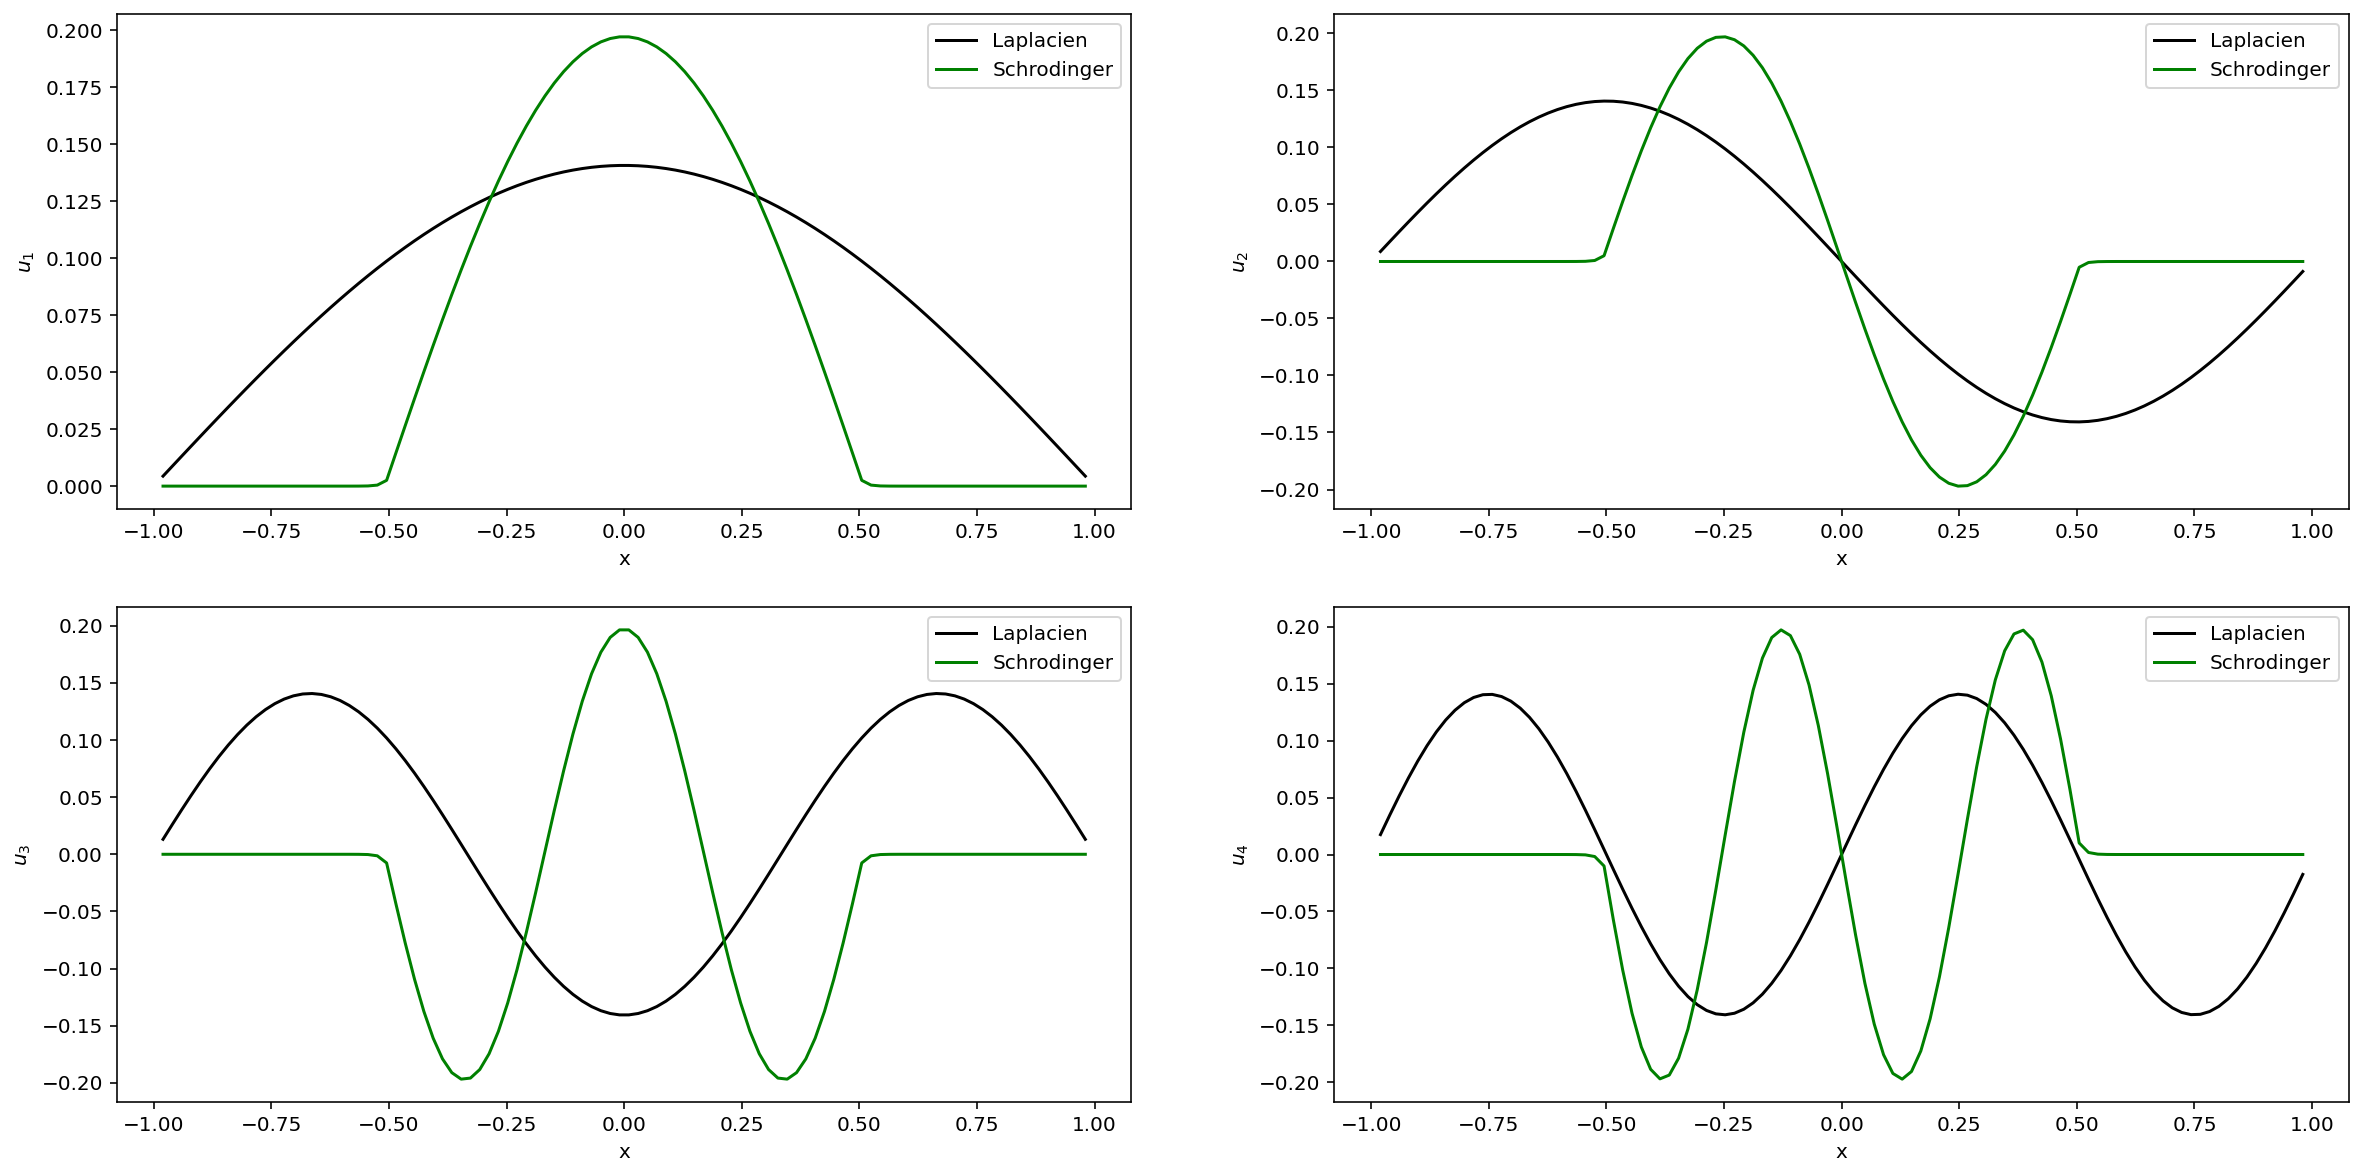

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for k, ax in enumerate(axs.flatten()):
    ax.plot(X, eigvec_Laplacien[:, k], c="black", label="Laplacien")
    ax.plot(X, -eigvec_Schrodinger[:, k], c="green", label="Schrodinger")
    ax.set_xlabel("x")
    ax.set_ylabel(f"$u_{k+1}$")
    ax.legend()

Puis on trace les probabilités de trouver la particule au voisinage d’un point x correspondant aux carrés
des fonctions propres:

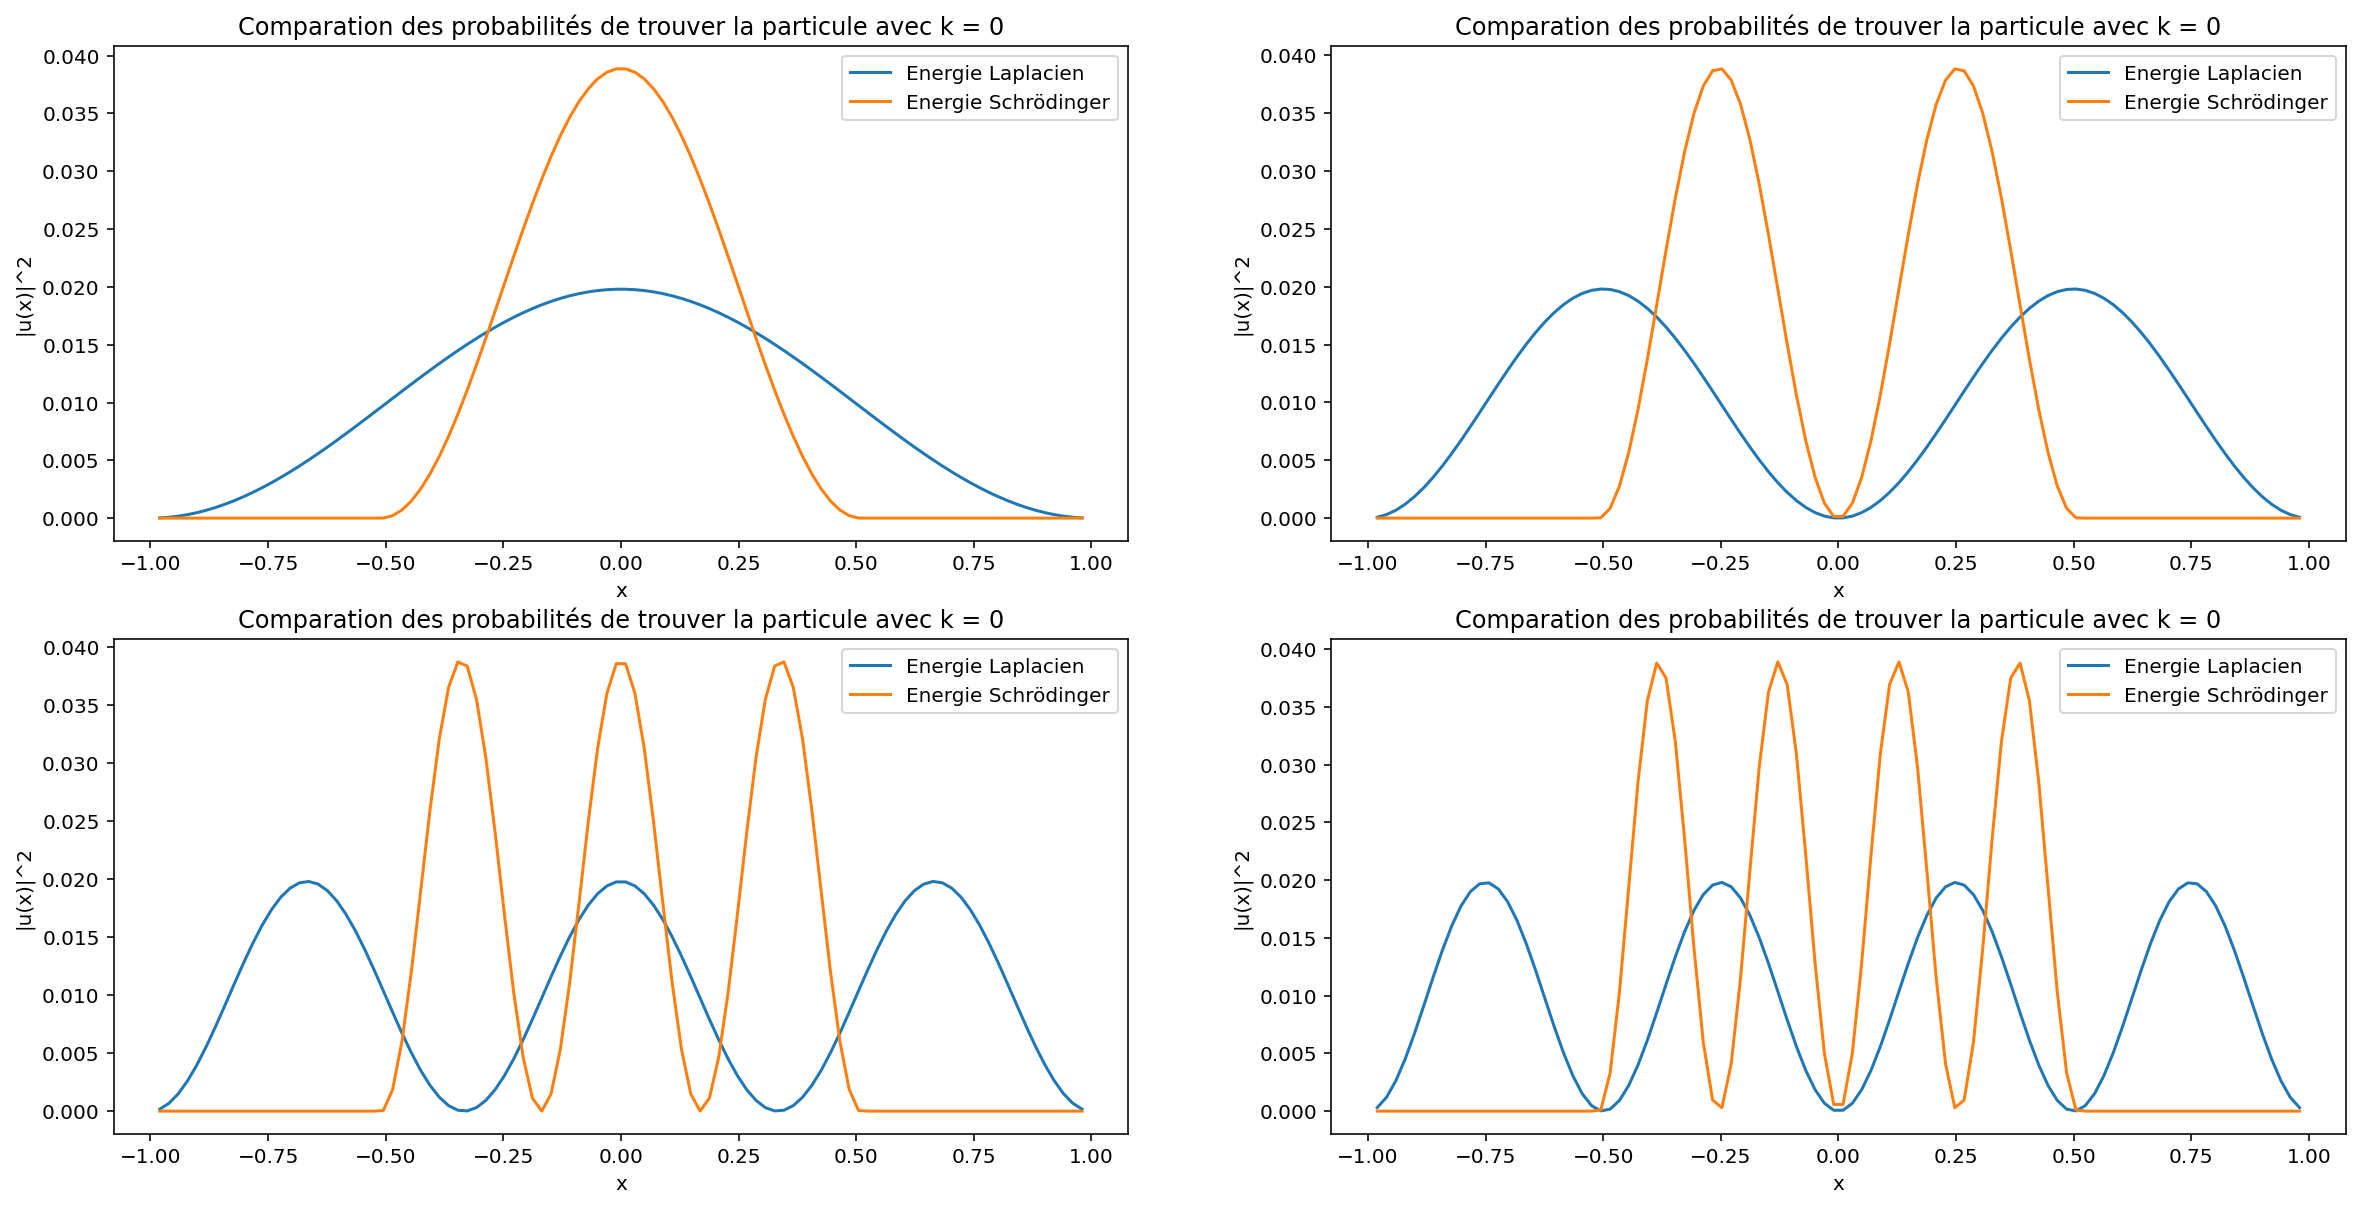

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for k, ax in enumerate(axs.flatten()):
    ax.plot(X, np.abs(eigvec_Laplacien[:, k])**2, label="Energie Laplacien")
    ax.plot(X, np.abs(eigvec_Schrodinger[:, k])**2, label="Energie Schrödinger")
    ax.set_xlabel("x")
    ax.set_ylabel("|u(x)|^2")
    ax.set_title("Comparation des probabilités de trouver la particule avec k = 0")
    ax.legend()

plt.show()

> Le potentiel permet finalement de modéliser une particule confinée dans un intervalle $[−a, a]$. 

> Les tracés ci-dessus valide ce résultat vu que la probabilité de trouver la particule en dehors $[−a, a]$ dans le cas de Schrödinger est proche de 0.